In [6]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.layers.core import Dense, Flatten, Dropout, Lambda
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.models import Sequential
import cv2

In [7]:
gh = pd.read_csv('/home/hemanth/Downloads/train _digits.csv')

In [8]:
gh.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = gh.label
del gh['label']


In [10]:
gh.shape

(42000, 784)

### RESHAPING INPUT DATA SO THAT IT CAN BE FED TO OUR CNN MODEL

In [11]:
fd = gh/255
X= np.array(fd).reshape([-1,28,28, 1])
X_for_sample= np.array(fd).reshape([-1,28,28])

In [12]:
X.shape

(42000, 28, 28, 1)

### SHOWING A SAMPLE IMAGE

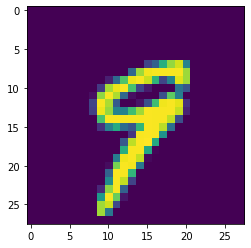

In [13]:
plt.imshow(X_for_sample[58])
plt.show()


### ONE-HOT ENCODING OF LABELS

In [14]:
Y = to_categorical(y, num_classes= 10)
Y.shape

(42000, 10)

In [15]:
meanm = X.mean().astype(float)
stdm = X.std().astype(float)


In [16]:
def normalise(q):
    return  (q-meanm)/stdm

THE MODEL Note that, in this model I have used BATCHNORMALIZATION after each CNN layer. This greatly increases the accuracy of the model and prevents overfitting.

In [17]:
model= Sequential()
model.add(Lambda(normalise, input_shape = (28,28, 1)))
model.add(Conv2D(32, (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(32, (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis = 1))

model.add(Conv2D(64, (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(64, (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization(axis = 1))

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = Adam())


In [18]:
model.optimizer.lr = 0.01

### FITTING THE INPUT

In [19]:
model.fit(X, Y, validation_split = 0.25, verbose = 1, batch_size = 32, epochs= 7 )

Epoch 1/7
985/985 [==============================] - 97s 99ms/step - loss: 0.2937 - accuracy: 0.9290 - val_loss: 0.1733 - val_accuracy: 0.9637
Epoch 2/7
985/985 [==============================] - 94s 95ms/step - loss: 0.1222 - accuracy: 0.9676 - val_loss: 0.0720 - val_accuracy: 0.9807
Epoch 3/7
985/985 [==============================] - 94s 96ms/step - loss: 0.1057 - accuracy: 0.9714 - val_loss: 0.0988 - val_accuracy: 0.9728
Epoch 4/7
985/985 [==============================] - 93s 94ms/step - loss: 0.1060 - accuracy: 0.9722 - val_loss: 0.2194 - val_accuracy: 0.9635
Epoch 5/7
985/985 [==============================] - 95s 96ms/step - loss: 0.1098 - accuracy: 0.9727 - val_loss: 0.0880 - val_accuracy: 0.9789
Epoch 6/7
985/985 [==============================] - 93s 94ms/step - loss: 0.1049 - accuracy: 0.9759 - val_loss: 0.2017 - val_accuracy: 0.9641
Epoch 7/7
985/985 [==============================] - 90s 92ms/step - loss: 0.0991 - accuracy: 0.9769 - val_loss: 0.4355 - val_accuracy: 0.9784

In [20]:
tr = pd.read_csv('/home/hemanth/Downloads/test _digits.csv')

In [21]:
bv = tr/255
Xt= np.array(bv).reshape([-1,28,28, 1])


In [22]:
prediction_test = model.predict(Xt)
prediction_test.shape



(28000, 10)

In [23]:
S = np.argmax(prediction_test ,axis = 1)

results = pd.Series(S,name="Label")

### FINAL PREDICTION DATAFRAME

In [24]:
subs = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
subs.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [26]:
data=subs.to_csv('my_mnist1.csv', index = False)
data